In [1]:
!pip list


Package                           Version
--------------------------------- ------------------
absl-py                           2.1.0
adjustText                        1.3.0
aext-assistant                    4.0.15
aext-assistant-server             4.0.15
aext-core                         4.0.15
aext-core-server                  4.0.15
aext-panels                       4.0.15
aext-panels-server                4.0.15
aext-share-notebook               4.0.15
aext-share-notebook-server        4.0.15
aext-shared                       4.0.15
aiobotocore                       2.12.3
aiofiles                          23.2.1
aiohttp                           3.9.5
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
altair                            5.0.1
anaconda-anon-usage               0.4.4
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.5.1
anaconda-nav

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [13]:
x_train.shape

(50000, 32, 32, 3)

In [15]:
x_test.shape

(10000, 32, 32, 3)

In [17]:
y_train


array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [19]:
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]


In [21]:
len(labels)

10

In [23]:
y_train[0]

array([6], dtype=uint8)

In [25]:
x_train.shape


(50000, 32, 32, 3)

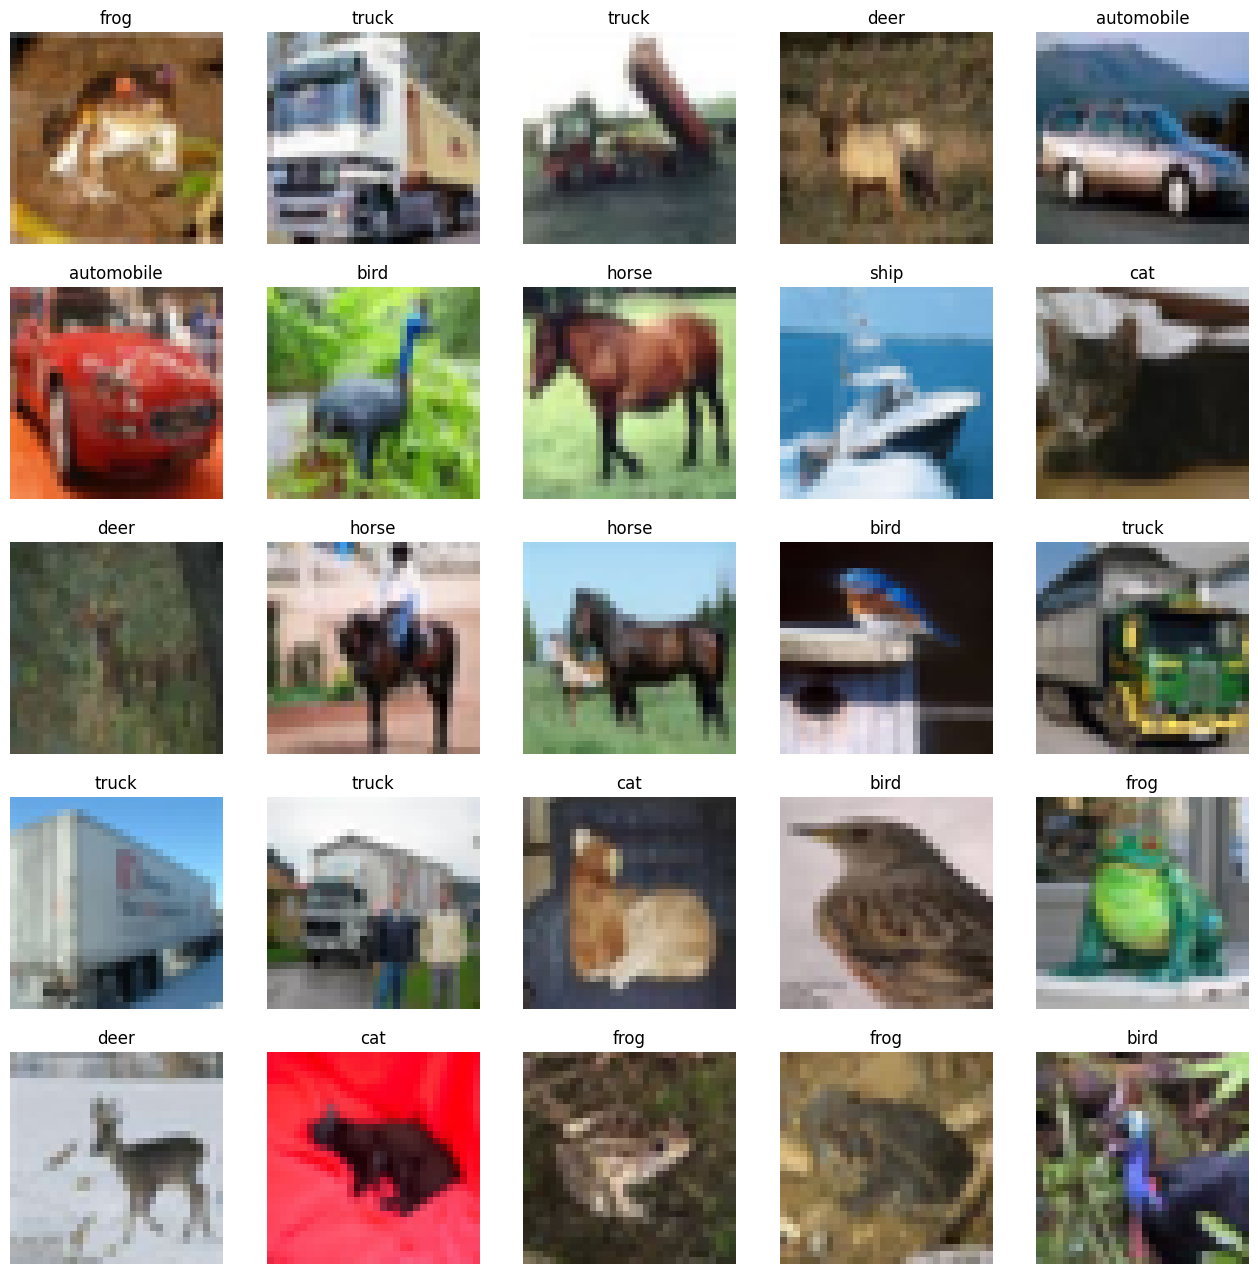

In [27]:
plt.figure(figsize = (16, 16))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.axis("off")
    plt.imshow(x_train[i])
    plt.title(labels[y_train[i][0]])

##### Build the model

In [30]:
model = Sequential()

model.add(Input(shape = (32, 32, 3)))

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dense(128, activation = "relu"))
model.add(Dense(len(labels), activation = "softmax"))





In [32]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [34]:
model.fit(x_train, y_train, epochs = 10, batch_size = 10)

Epoch 1/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 35s 7ms/step - accuracy: 0.1797 - loss: 2.5892
Epoch 2/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 33s 7ms/step - accuracy: 0.4359 - loss: 1.5591
Epoch 3/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 33s 7ms/step - accuracy: 0.5067 - loss: 1.3919
Epoch 4/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 33s 7ms/step - accuracy: 0.5575 - loss: 1.2660
Epoch 5/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 33s 7ms/step - accuracy: 0.5928 - loss: 1.1825
Epoch 6/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 33s 7ms/step - accuracy: 0.6237 - loss: 1.1056
Epoch 7/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 32s 6ms/step - accuracy: 0.6398 - loss: 1.0571
Epoch 8/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 33s 7ms/step - accuracy: 0.6541 - loss: 1.0050
Epoch 9/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 33s 7ms/step - accuracy: 0.6764 - loss: 0.9595
Epoch 10/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 33s 7ms/step - accuracy: 0.6886 - loss: 0.9117


In [35]:
model.evaluate(x_test, y_test, batch_size = 1)

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 4ms/step - accuracy: 0.5948 - loss: 1.2883


[1.2745575904846191, 0.5909000039100647]

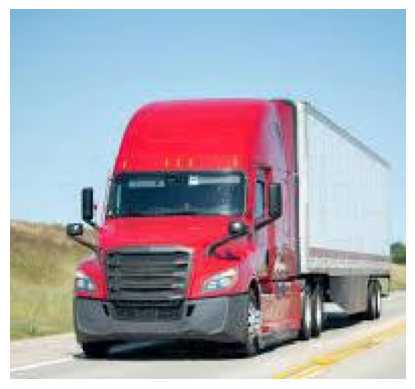

In [36]:
import matplotlib.image as imgreader

img = imgreader.imread("download.jpg")

plt.imshow(img)
plt.axis('off')  
plt.show()

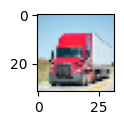

In [37]:
import cv2
img = cv2.imread("download.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (32, 32))

plt.figure(figsize= (1, 1))
plt.imshow(img)

In [38]:
img = img.reshape(1, 32, 32, 3)
probs = model.predict(img)
index = probs.argmax()
print(labels[index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
truck


In [45]:
print(probs)

[[4.4881650e-03 5.5626500e-02 3.1191597e-05 1.6045920e-04 8.1746230e-06
  3.4344073e-06 9.3238541e-06 5.0501272e-05 1.8278214e-03 9.3779445e-01]]
